## Exploration for Claim 2: ##
    Having porch or deck increases home sale price

### Null hypothesis: There is no relationship between outdoor space and sale price

### Alternative hypothesis: There is a relationship between outdoor space and sale price



### Make necessary imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms

%matplotlib inline
plt.style.use('ggplot')

#from ltests import model

### Import our combined csv into a DataFrame

In [25]:
raw = pd.read_csv('../../data/master.csv', low_memory=False, dtype={'id': object})


In [26]:
#how many entries are there?
raw.shape[0]

62039

### SalePrice will be our target variable, so lets' set that as the index

In [27]:
#set the target to column index 0
cols = list(df.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
df = df[cols]
df.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint,OutdoorSpace
2,485500,0001000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254,244.0
8,358308,0001000067,2979287,03/18/2019,20190327000321,,,,,,...,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736,170.0
11,850000,0001200008,2991776,05/17/2019,20190604001211,,,,,,...,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488,260.0
22,465000,0002000015,3022128,11/19/2019,20191122001296,,,,,,...,1.0,1961.0,0.0,0.0,0.0,0.0,5.0,0.0,0.086336,890.0
36,350000,0003000086,2995868,06/18/2019,,,,,,,...,0.0,1948.0,0.0,0.0,0.0,0.0,4.0,0.0,0.081522,240.0


### We would like to select only those entries that have a sale price greater than 0

In [28]:
raw = raw[raw.SalePrice > 0]

#How many entries are left?
raw.shape[0]

42214

### Now we select the sales with the proper PropertyType codes
The following is interest to us:
 - 11: Household, single family units

These are not because they don't help us answer our questions about homeownership

 - 12: Multiple family residence (Residential, 2-4 units)
 - 13: Multiple family residence (Residential, 5+ units)
 - 14: Residential condominiums
  
*These codes can be found in the Lookup.zip file located at*

https://info.kingcounty.gov/assessor/DataDownload/default.aspx 

In [29]:
proptypes = [11]

df = raw[raw.PropertyType.isin(proptypes)]

#How many entries are left now?
df.shape[0]


19264

### Let's look at houses that have any porch or deck (aka OutdoorSpace)

In [30]:
#add column to dataframe OutdoorSpace
df['OutdoorSpace']= df['SqFtOpenPorch']+df['SqFtEnclosedPorch']+df['SqFtDeck']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# How many entries have we got?
# It should still be 19264.
df.shape[0]

19264

In [33]:
#filling in NaN with zero
#assuming they are NaN because there is no porch or deck
#df['OutdoorSpace'] = df['OutdoorSpace'].fillna(0)

### Generate our first simple model of Sale Price vs OutdoorSpace

In [34]:
fsm_df = df[["SalePrice", "OutdoorSpace"]].copy()
fsm_df.dropna(inplace=True)
formula = 'SalePrice ~ OutdoorSpace'
fsm = ols(formula=formula, data=fsm_df).fit()

What kind of p-value have we got?

In [37]:
fsm.pvalues

Intercept       0.0
OutdoorSpace    0.0
dtype: float64

Well that was unexpected.

##### Let's look at the summary

In [36]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1567.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:21:33   Log-Likelihood:            -2.8590e+05
No. Observations:               19264   AIC:                         5.718e+05
Df Residuals:                   19262   BIC:                         5.718e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.392e+05   6247.496    102.308      0.000    6.27e+05    6.51e+05
OutdoorSpace   737.1722     18.621     39.589      0.000     700.674     773.671
==============================================================================
Omnibus:                    48826.207   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2978396872.824
Skew:                          27.660   Prob(JB):                         0.00
Kurtosis:                    1928.504   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result?

That is not a very good looking R^2. Only 0.075

## Check homoscedasticity

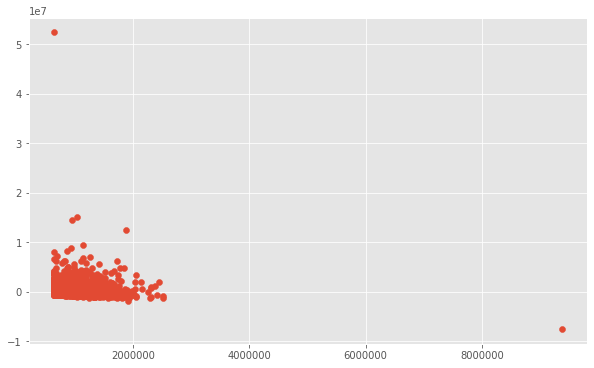

In [38]:
fsm_resids = fsm.resid
y_hat = fsm.predict()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_hat, fsm_resids);

## check normality with Q-Q plot

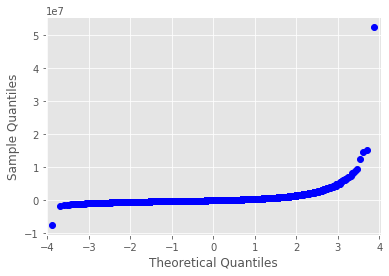

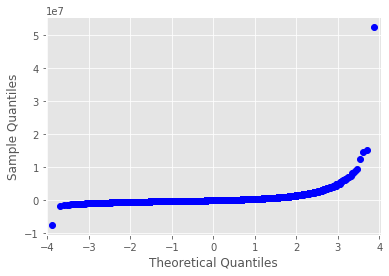

In [49]:
sm.qqplot(fsm_resids)

## check normality with Jarque Bera test

In [50]:
name = ['JB', 'Prob', 'Skew', 'Kurtosis']
test = sms.jarque_bera(fsm.resid)
list(zip(name, test))

[('JB', 2978396872.824445),
 ('Prob', 0.0),
 ('Skew', 27.66046016424133),
 ('Kurtosis', 1928.5043310849903)]

### Let's try do drop some outliers 

let's remove elements with a z-score outsize of [-3,3] in either the sale price or the square foot columns

In [51]:
from scipy import stats
ssm_df = fsm_df[(np.abs(stats.zscore(fsm_df)) < 3).all(axis=1)]

In [52]:
formula = 'SalePrice ~ OutdoorSpace'
ssm = ols(formula=formula, data=ssm_df).fit()

In [53]:
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2065.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:24:05   Log-Likelihood:            -2.6818e+05
No. Observations:               18771   AIC:                         5.364e+05
Df Residuals:                   18769   BIC:                         5.364e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.228e+05   3885.741    160.272      0.000    6.15e+05     6.3e+05
OutdoorSpace   635.3905     13.984     45.438      0.000     607.981     662.800
==============================================================================
Omnibus:                     6214.765   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21908.029
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       7.116   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check homoscedasticity again

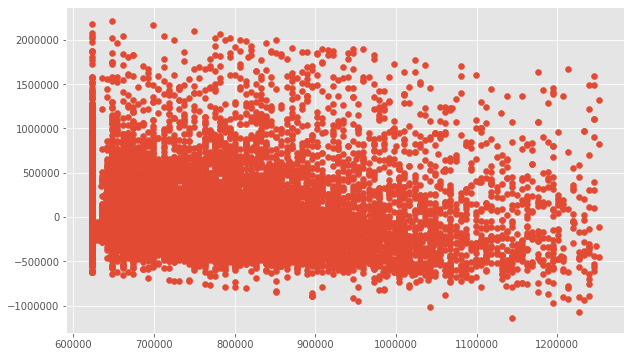

In [54]:
ssm_resids = ssm.resid
y_hat = ssm.predict()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_hat, ssm_resids);

## check normality with Q-Q plot again

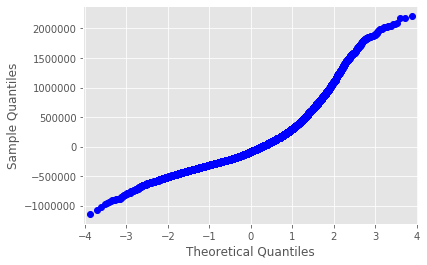

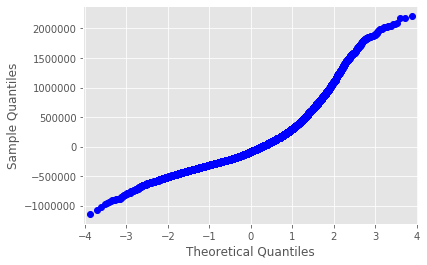

In [55]:
sm.qqplot(ssm_resids)

## check normality with Jarque Bera test again

In [56]:
name = ['JB', 'Prob', 'Skew', 'Kurtosis']
test = sms.jarque_bera(ssm.resid)
list(zip(name, test))

[('JB', 21908.028722707073),
 ('Prob', 0.0),
 ('Skew', 1.6633465027389773),
 ('Kurtosis', 7.116311236929358)]

## Check means of populations houses with and without porch/deck

In [57]:
df['OutdoorSpace'].describe()

count    19264.000000
mean       210.701464
std        261.106145
min          0.000000
25%         30.000000
50%        130.000000
75%        300.000000
max      11850.000000
Name: OutdoorSpace, dtype: float64

In [58]:
df['OutdoorSpace'].isnull().sum()

0

In [59]:
#create dataframe with OutdoorSpace greater than zero... 
# meaning these are houses with a porch or deck
porch = df[df.OutdoorSpace > 0]
# how many 
a=porch.shape[0]
print(a)

14672


In [60]:
no_porch = df[df.OutdoorSpace == 0] 
b=no_porch.shape[0]
print(b)

4592


In [61]:
print(a+b)

19264


In [62]:
alt = porch.SalePrice.values

In [63]:
control = no_porch.SalePrice.values

In [64]:
alt.mean(), control.mean()

(846473.3075926936, 628407.5222125435)

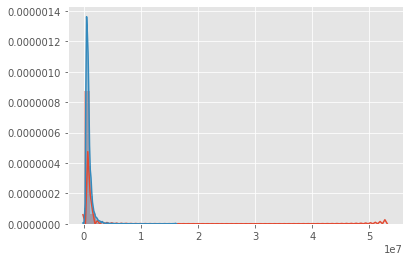

In [65]:
sns.distplot(control)
sns.distplot(alt)


In [66]:
from scipy.stats import ttest_ind
critical_tstat = stats.t.ppf(.95, 21479)

ttest_result=ttest_ind(control, alt)
print(f'critical t_stat: {critical_tstat}')
print(f'test t-stat: {ttest_result.statistic}')
print(f'pvalue = {ttest_result.pvalue/2}')

critical t_stat: 1.6449245723060157
test t-stat: -18.54118065283717
pvalue = 2.207030074493875e-76
